In [1]:
# ============================================================
# 🚀 EXOHABITAI — LEVEL-400 CLEANING + FEATURE ENGINEERING PIPELINE
# SINGLE CELL VERSION — PRODUCTION READY
# ============================================================

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("dark_background")

print("🚀 ExoHabitAI Cleaning + Feature Engineering Started")

🚀 ExoHabitAI Cleaning + Feature Engineering Started


In [2]:
# ============================================================
# 🌌 AUTO PROJECT ROOT DETECTION (NOTEBOOK SAFE)
# ============================================================

CURRENT_DIR = os.getcwd()
PROJECT_ROOT = os.path.dirname(CURRENT_DIR)

RAW_DATA_PATH = os.path.join(
    PROJECT_ROOT,
    "data",
    "raw",
    "PS_2026.01.19_01.24.31.csv"
)

PROCESSED_DIR = os.path.join(PROJECT_ROOT, "data", "processed")
os.makedirs(PROCESSED_DIR, exist_ok=True)

CLEAN_PATH = os.path.join(PROCESSED_DIR, "clean_exoplanets.csv")
FEATURE_PATH = os.path.join(PROCESSED_DIR, "feature_engineered_exoplanets.csv")

print("📂 RAW PATH:", RAW_DATA_PATH)
print("📂 OUTPUT DIR:", PROCESSED_DIR)


📂 RAW PATH: d:\Infosys Springboard Internship\ExoHabitAI\data\raw\PS_2026.01.19_01.24.31.csv
📂 OUTPUT DIR: d:\Infosys Springboard Internship\ExoHabitAI\data\processed


In [3]:
# ============================================================
# 1️⃣ LOAD DATASET (NASA SAFE MODE)
# ============================================================

if not os.path.exists(RAW_DATA_PATH):
    raise FileNotFoundError(f"Dataset not found:\n{RAW_DATA_PATH}")

df = pd.read_csv(
    RAW_DATA_PATH,
    comment="#",
    sep=",",
    engine="python",
    on_bad_lines="skip",
    encoding="utf-8"
)

df.columns = df.columns.str.strip()

print("\n✅ Dataset Loaded")
print("Shape:", df.shape)



✅ Dataset Loaded
Shape: (39251, 289)


In [4]:
# ============================================================
# 2️⃣ BASIC CLEANING (LEVEL-400)
# ============================================================

print("\n🧹 Cleaning dataset...")

# Replace inf values
df = df.replace([np.inf, -np.inf], np.nan)

# Convert numeric columns safely
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors="ignore")

# Drop columns with >95% missing
missing_pct = df.isna().mean()
drop_cols = missing_pct[missing_pct > 0.95].index.tolist()

print("Dropping high-missing columns:", len(drop_cols))
df = df.drop(columns=drop_cols)


🧹 Cleaning dataset...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_33128\960012902.py:12: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


Dropping high-missing columns: 37


In [5]:
# ============================================================
# 3️⃣ SCIENTIFIC FEATURE SELECTION
# ============================================================

core_features = [
    "pl_rade",
    "pl_eqt",
    "pl_orbper",
    "st_teff",
    "st_mass",
    "st_rad"
]

existing = [c for c in core_features if c in df.columns]
df_core = df[existing].copy()

print("\n🧠 Core Features Found:", existing)

# Fill missing with median
df_core = df_core.fillna(df_core.median(numeric_only=True))


🧠 Core Features Found: ['pl_rade', 'pl_eqt', 'pl_orbper', 'st_teff', 'st_mass', 'st_rad']


In [6]:
# ============================================================
# 4️⃣ ADVANCED FEATURE ENGINEERING (HSI + SCI)
# ============================================================

print("\n⚙️ Engineering scientific features...")

def normalize(series):
    return (series - series.min()) / (series.max() - series.min() + 1e-9)

if "pl_rade" in df_core:
    rade_score = 1 - abs(df_core["pl_rade"] - 1)

if "pl_eqt" in df_core:
    eqt_score = 1 - abs(df_core["pl_eqt"] - 288) / 288

if "pl_orbper" in df_core:
    orb_score = normalize(df_core["pl_orbper"])

df_core["HSI"] = (
    normalize(rade_score) * 0.4 +
    normalize(eqt_score) * 0.4 +
    normalize(orb_score) * 0.2
)

if "st_teff" in df_core:
    teff_score = 1 - abs(df_core["st_teff"] - 5778) / 5778

if "st_mass" in df_core:
    mass_score = 1 - abs(df_core["st_mass"] - 1)

if "st_rad" in df_core:
    rad_score = 1 - abs(df_core["st_rad"] - 1)

df_core["SCI"] = (
    normalize(teff_score) * 0.5 +
    normalize(mass_score) * 0.3 +
    normalize(rad_score) * 0.2
)



⚙️ Engineering scientific features...


In [7]:
# ============================================================
# 5️⃣ CREATE TARGET LABEL (HABITABILITY)
# ============================================================

print("\n🎯 Creating Habitability Label...")

df_core["habitability"] = (
    (df_core["HSI"] > 0.6) &
    (df_core["SCI"] > 0.4)
).astype(int)



🎯 Creating Habitability Label...


In [8]:

# ============================================================
# 6️⃣ MERGE BACK WITH ORIGINAL DATA
# ============================================================

df_final = df.copy()
df_final = df_final.join(df_core[["HSI", "SCI", "habitability"]])

print("\n✅ Feature Engineering Complete")
print("Final Shape:", df_final.shape)



✅ Feature Engineering Complete
Final Shape: (39251, 255)


In [9]:
# ============================================================
# 7️⃣ SAVE OUTPUT FILES
# ============================================================

print("\n💾 Saving cleaned dataset...")
df_final.to_csv(FEATURE_PATH, index=False)

print("Saved:", FEATURE_PATH)


💾 Saving cleaned dataset...
Saved: d:\Infosys Springboard Internship\ExoHabitAI\data\processed\feature_engineered_exoplanets.csv


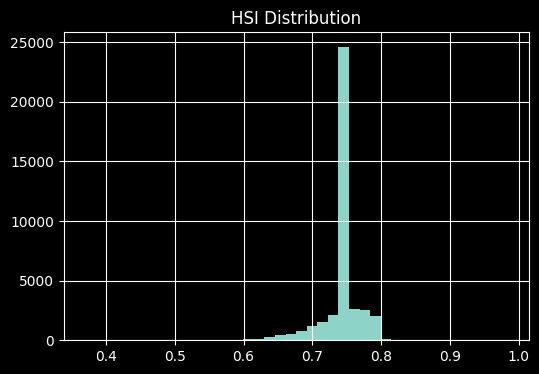

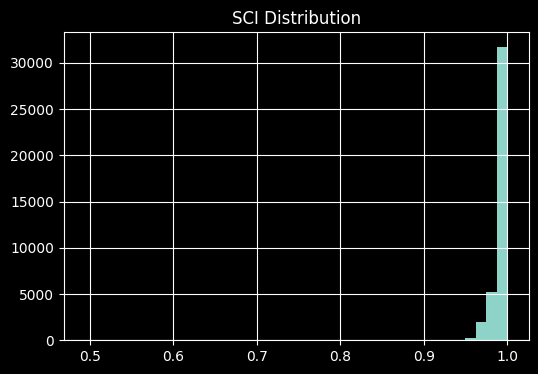

In [10]:
# ============================================================
# 8️⃣ QUICK VISUAL CHECK
# ============================================================

plt.figure(figsize=(6,4))
df_core["HSI"].hist(bins=40)
plt.title("HSI Distribution")
plt.show()

plt.figure(figsize=(6,4))
df_core["SCI"].hist(bins=40)
plt.title("SCI Distribution")
plt.show()

In [11]:
# ============================================================
# 🎉 LEVEL-400 COMPLETE
# ============================================================

print("\n🚀 LEVEL-400 CLEANING + FEATURE ENGINEERING COMPLETE")
print("READY FOR WEEK-4 MODEL TRAINING")


🚀 LEVEL-400 CLEANING + FEATURE ENGINEERING COMPLETE
READY FOR WEEK-4 MODEL TRAINING
